                                       Boston housing price prediction case
   ## Anis Namouchi

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Reading the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats


BostonData=pd.read_csv('C:/Users/Anis/Desktop/dataset/BostonHousingData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BostonData.shape)

# Removing duplicate rows if any
BostonData=BostonData.drop_duplicates()
print('Shape After deleting duplicate values:', BostonData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BostonData.head(10)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
BostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:
BostonData['CRIM'].mean()

3.6135235573122535

In [5]:
BostonData['CRIM'].median()

0.25651

In [6]:
BostonData['CRIM'].max()

88.9762

In [7]:
# Looking at the descriptive statistics of the data
BostonData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [67]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonData.nunique()

CRIM        504
ZN           26
INDUS        76
CHAS          2
NOX          81
RM          446
AGE         356
DIS         412
RAD           9
TAX          66
PTRATIO      46
B           357
LSTAT       455
MEDV        229
age_span      2
dtype: int64

In [70]:
# Finding how many missing values are there for each column
BostonData.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
age_span    0
dtype: int64

In [68]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

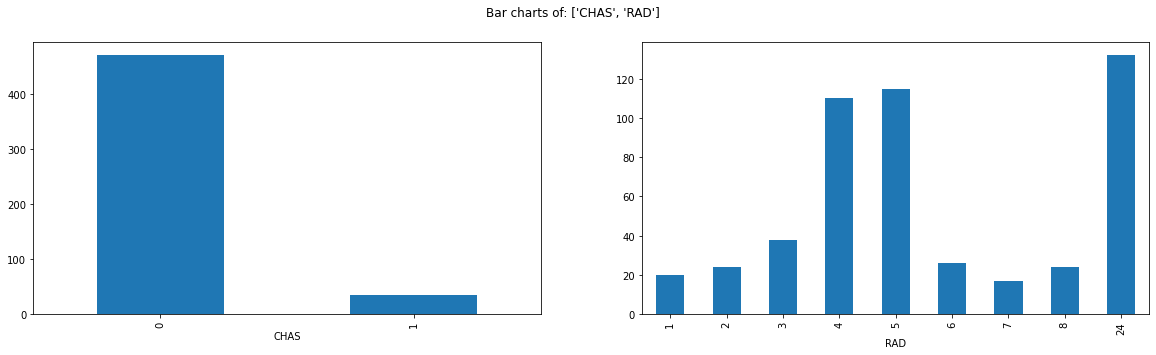

In [69]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=BostonData, colsToPlot=['CHAS','RAD'])

### Median value of owner-occupied homes


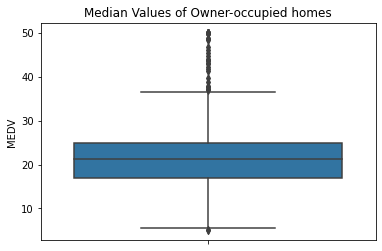

In [45]:
ax = sns.boxplot(y='MEDV', data=BostonData)
plt.title("Median Values of Owner-occupied homes");

### Histogram for the Charles river variable


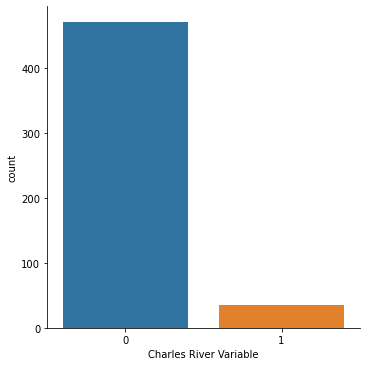

In [46]:
sns.catplot(x='CHAS', kind='count', data=BostonData)
plt.xlabel("Charles River Variable");

### Boxplot for the MEDV variable vs the AGE variable


Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [48]:
BostonData.loc[(BostonData.AGE <= 35), 'age_group'] = '35 years and younger'
BostonData.loc[((BostonData.AGE > 35)&(BostonData.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
BostonData.loc[(BostonData.AGE >= 70), 'age_group'] = '70 years and older'

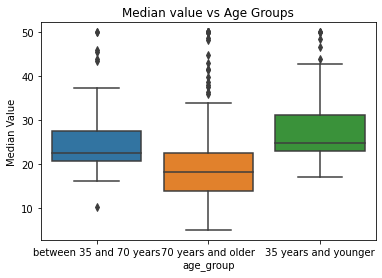

In [49]:
ax = sns.boxplot(x='age_group', y='MEDV', data=BostonData)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

### Relationship between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town


Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



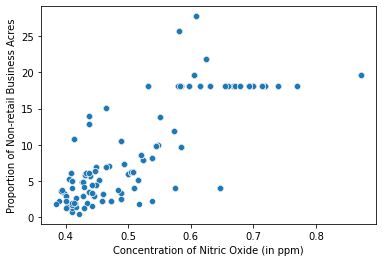

In [50]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=BostonData)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

===> From the above scatter plot, we can say that there is a positive sloping relationship between concentration of Nitric Oxides and the proportion of non-retail business areas per town. But as the concentration of grows more than 0.6 ppm, the industrial area remains approximately the same.


### The teacher pupil ratio


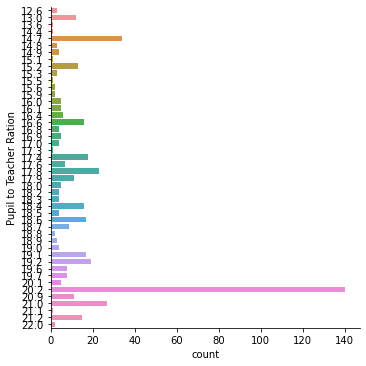

In [51]:
sns.catplot(y="PTRATIO", kind="count", data=BostonData)
plt.ylabel("Pupil to Teacher Ration");

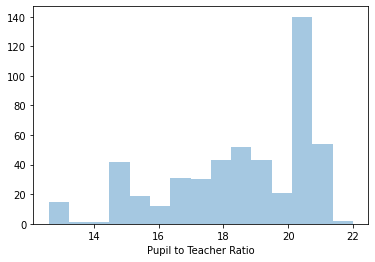

In [52]:
# Distribution plot
sns.distplot(BostonData.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio");

In [57]:
#Stating Hypothesis

#   \(H_0: µ_1 = µ_2\) ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")

#   \(H_a: µ_1 ≠ µ_2\) ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

#  Setting α to 0.05

In [56]:
scipy.stats.ttest_ind(BostonData[BostonData.CHAS == 1].MEDV,
                     BostonData[BostonData.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

====> Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significance difference in median value of houses bounded by Charles river and not.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?


In [58]:
#Stating Hypothesis

# Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
# Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.
# Setting alpha = 0.05

In [60]:
BostonData.loc[(BostonData.AGE > 81), 'age_span'] = 'before 1940'
BostonData.loc[(BostonData.AGE <= 81), 'age_span'] = 'after 1940'

In [61]:
scipy.stats.levene(BostonData[BostonData.age_span=='before 1940']['MEDV'],
                  BostonData[BostonData.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

======> Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

Question : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [62]:
# Stating Hypothesis:

# Null Hypothesis: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
# Alternative Hypothesis: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

In [64]:
scipy.stats.pearsonr(BostonData.NOX, BostonData.INDUS)


(0.763651446920915, 7.913361061239593e-98)

====> Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.

And as the r value is positive and close to zero, we can conclude that there is a almost strong relationship between these two variables and the relationship curve will be positively sloping.





Question : What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [65]:
import statsmodels.api as sm


In [66]:
X = BostonData['DIS']

y = BostonData['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.21e-08
Time:                        16:56:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.